<a href="https://colab.research.google.com/github/GandharbGithub/AudioVisualiser2/blob/main/Heart_Disease_Prediction_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Prediction

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
# loading the csv data to a Pandas DataFrame
# from google.colab import drive
# drive.mount('/content/drive')
# file_path = '/content/drive/My Drive/Colab Notebooks/heart.csv'


In [3]:
# print first 5 rows of the dataset
heart_data = pd.read_csv('/content/heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# statistical measures about the data
heart_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [9]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [10]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [11]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [12]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting the Data into Training data & Test Data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


Detecting Missing Values

In [15]:
import missingno as msno

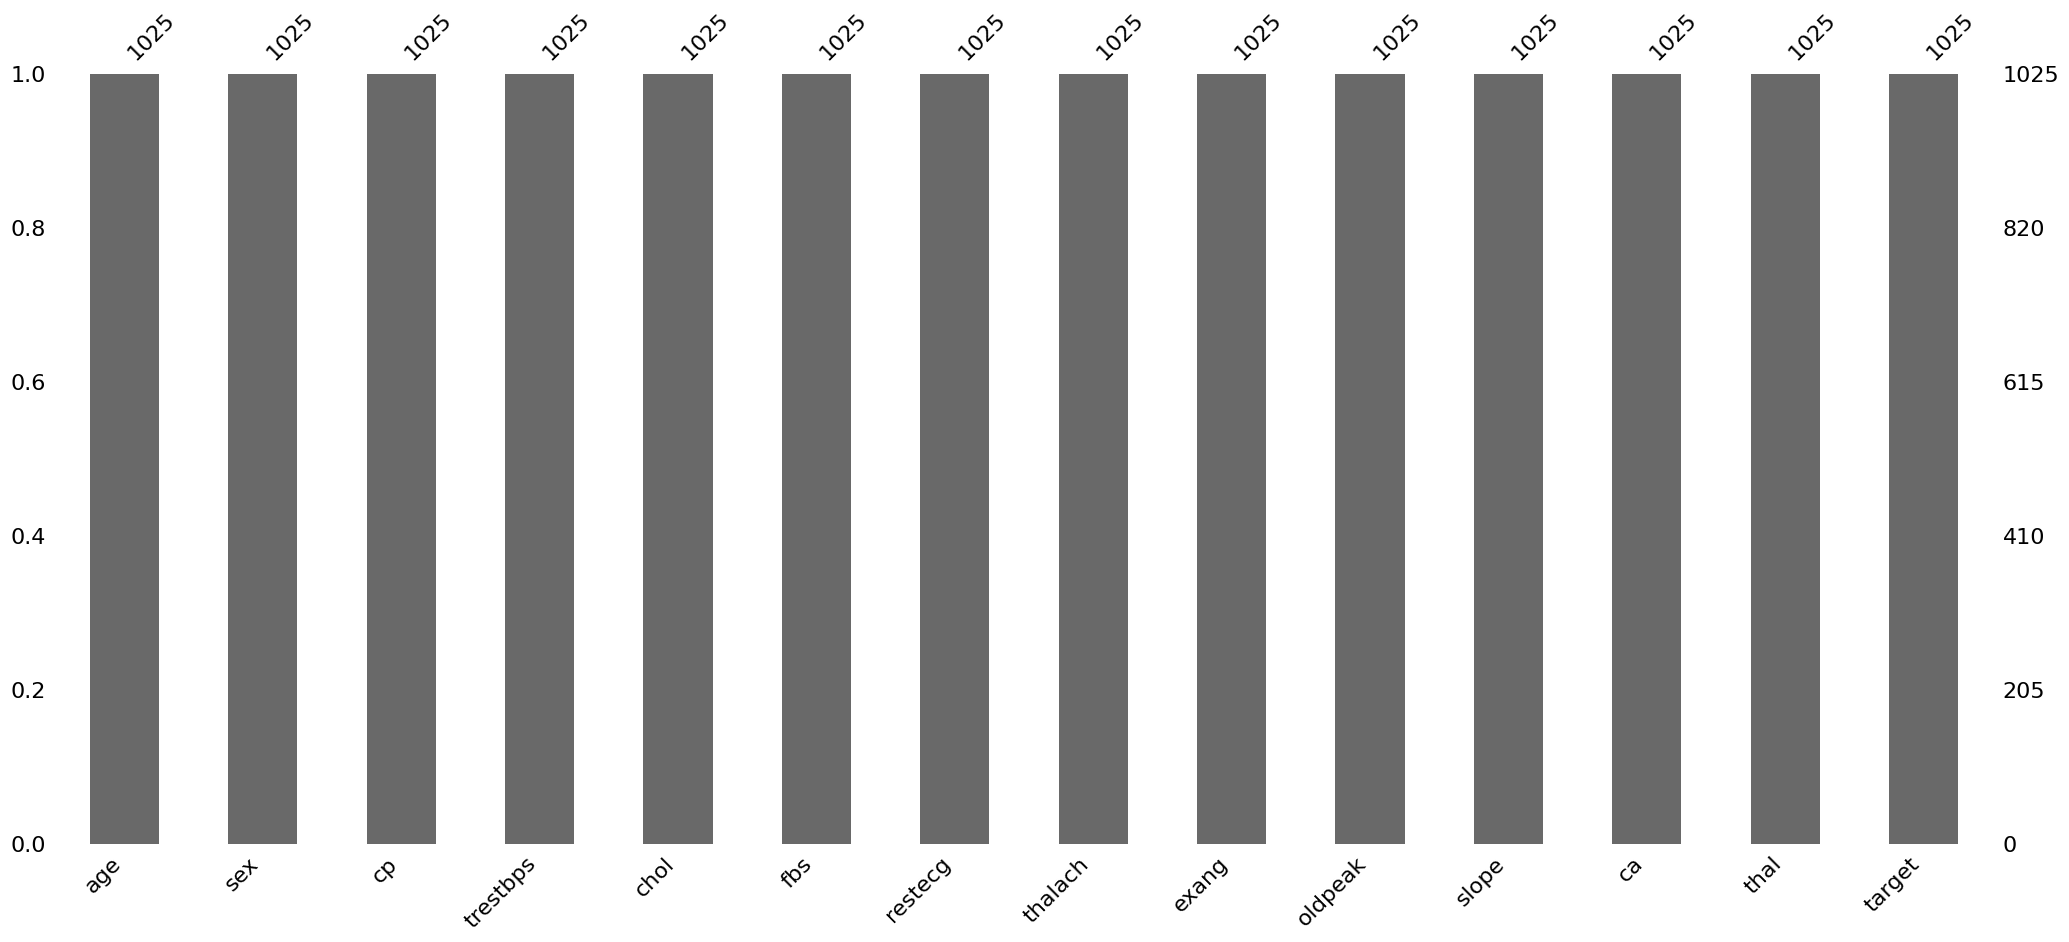

In [16]:
msno.bar (heart_data)
plt. show ( )

In [17]:
heart_data.duplicated().sum()

723

In [18]:
## remove duplicates
heart_data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


#Decision Tree (paper accuracy = 76.35)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
# Create model object
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [22]:
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
print(confusion_matrix(Y_test, predictions))

[[100   0]
 [  0 105]]


In [25]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



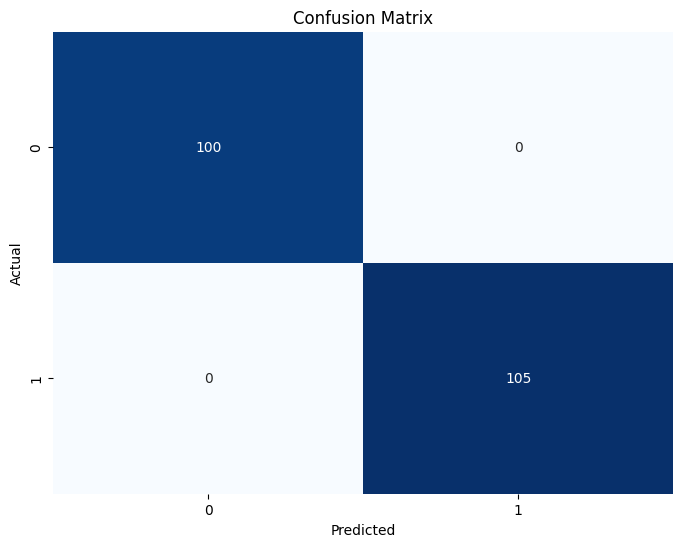

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix (if not already computed)
confusion_matrix = confusion_matrix(Y_test, predictions)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#Random Forest (Paper accuracy 87.6)


In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators = 200)

In [29]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [30]:
rfc_pred = rfc.predict(X_test)

Accuracy score

In [31]:
X_train_prediction = dtree.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [33]:
X_test_prediction = dtree.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [34]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  1.0


Predictive system

In [35]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = dtree.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#SVM (paper accuracy 94.6%)

In [36]:
from sklearn.svm import SVC
model = SVC()

In [37]:
model.fit(X_train,Y_train)

SVC()

In [38]:
model.score(X_test,Y_test)

0.7073170731707317

###Tuned Parameters
1.Regularization (C)

In [39]:
model_C = SVC(C=1000)
model_C.fit(X_train,Y_train)
model_C.score(X_test,Y_test)

0.8195121951219512

2.Gamma

In [40]:
model_g = SVC()
model_g.fit(X_train,Y_train)
model_g.score(X_test,Y_test)

0.7073170731707317

3.Kernel

In [41]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, Y_train)
model_linear_kernal.score(X_test, Y_test)

0.824390243902439

#Logistic Regression (paper accuracy = 85.9%)

In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [43]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [44]:
classifier_regressor=GridSearchCV(clf,param_grid=parameter,scoring='accuracy',cv=5)

In [45]:
clf.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_predicted = clf.predict(X_test)

In [47]:
clf.predict_proba(X_test)
# first column 0, second column 1

array([[0.9568642 , 0.0431358 ],
       [0.37655507, 0.62344493],
       [0.44449009, 0.55550991],
       [0.94516042, 0.05483958],
       [0.48873162, 0.51126838],
       [0.26453375, 0.73546625],
       [0.00395451, 0.99604549],
       [0.00763608, 0.99236392],
       [0.99486898, 0.00513102],
       [0.94516042, 0.05483958],
       [0.01243265, 0.98756735],
       [0.31630562, 0.68369438],
       [0.16216826, 0.83783174],
       [0.04903852, 0.95096148],
       [0.30030456, 0.69969544],
       [0.4057764 , 0.5942236 ],
       [0.00925312, 0.99074688],
       [0.06618751, 0.93381249],
       [0.03133097, 0.96866903],
       [0.5451336 , 0.4548664 ],
       [0.30944015, 0.69055985],
       [0.26147255, 0.73852745],
       [0.99643517, 0.00356483],
       [0.13351693, 0.86648307],
       [0.18601421, 0.81398579],
       [0.63331838, 0.36668162],
       [0.95032583, 0.04967417],
       [0.60670211, 0.39329789],
       [0.22352763, 0.77647237],
       [0.08196795, 0.91803205],
       [0.

In [48]:
clf.score(X_test,Y_test)

0.8048780487804879

##Neural Networks


In [49]:
import tensorflow as tf
from tensorflow import keras

# Define the input shape based on the number of features in your dataset
input_dim = X_train.shape[1]

# Create a Sequential model
model = keras.Sequential()

# Add an input layer
model.add(keras.layers.Input(shape=(input_dim,)))

# Add one or more hidden layers
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))  # Dropout for regularization
model.add(keras.layers.Dense(32, activation='relu'))

# Add the output layer for binary classification (sigmoid activation)
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [50]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Load and preprocess your heart disease dataset here
# X_train, X_test, y_train, y_test = train_test_split(...)
X = heart_data.drop(columns=['target'])  # Replace 'target' with the actual name of your target variable
y = heart_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple feedforward neural network
model = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),  # Input layer
    keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    keras.layers.Dropout(0.5),  # Dropout layer for regularization
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
26/26 [==============================] - 1s 12ms/step - loss: 35.7353 - accuracy: 0.4988 - val_loss: 8.4376 - val_accuracy: 0.4927
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 18.8445 - accuracy: 0.4634 - val_loss: 3.6275 - val_accuracy: 0.4390
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 15.1052 - accuracy: 0.4927 - val_loss: 2.8111 - val_accuracy: 0.4829
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 12.2062 - accuracy: 0.5183 - val_loss: 0.8272 - val_accuracy: 0.6683
Epoch 5/10
26/26 [==============================] - 0s 4ms/step - loss: 9.5426 - accuracy: 0.5220 - val_loss: 2.0134 - val_accuracy: 0.5512
Epoch 6/10
26/26 [==============================] - 0s 3ms/step - loss: 7.5506 - accuracy: 0.5573 - val_loss: 0.8379 - val_accuracy: 0.6927
Epoch 7/10
26/26 [==============================] - 0s 4ms/step - loss: 6.8084 - accuracy: 0.5427 - val_loss: 0.9123 - val_accuracy: 0.7024
Epoch 8/10
26/2

##KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load and preprocess your dataset (replace X and y with your data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with a specified number of neighbors (k)
k = 5  # You can adjust the number of neighbors (k) as needed
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7317073170731707
